# Motivation for a Different Model

With feedforward neural networks, we performed pretty well with MNIST and Fashion MNIST datasets. But, these images are simple and centered within the input space that contains them. Feedforward neural networks are very good at identifying patterns. So, if images occupy the same position within their input space, feedforward nets can quickly and effectively identify the image patterns. And, if the images are simple, the patterns emerge more easily. But, if images don't occupy the same positions in their input spaces, feedforward nets have great difficulty identifying the patterns and thereby perform horribly! So, we need a different model to work with these types of images.

# Convolutional Neural Network

We can train complex and off-center images with convolutional neural networks and get good results. A **convolutional neural network** (CNN) is a type of neural network that is most often applied to image processing problems, but can can also be used in natural language processing projects.

Convolutional Neural Networks work differently than feedforward networks because they treat data as spatial. Instead of neurons being connected to every neuron in the previous layer, they are instead only connected to neurons close to them and all have the same weight. This simplification in the connections means the network upholds the spatial aspect of the dataset.

Suppose the image is a profile of a child's face. A CNN doesn't think the child's eye is repeated all over the image. It can efficiently locate the child's eye in the image because of the filtering process that it undertakes.

# CNN Architecture

Like a feedforward neural network, a CNN consists of multiple layers. However, the convolutional layer and pooling layer make it unique. Like other neural networks, it also has a ReLU (rectified linear unit) layer and a fully connected layer. The ReLU layer in **any** neural net acts as an activation function ensuring nonlinearity as the data moves through each layer of the network. Without ReLU activation, the data being fed into each layer would lose the dimensionality that we want it to maintain. That is, we would lose the itegrity of the original data as it moves through the network. The fully connected layer allows a CNN to perform classification on the data.

The most important building block of a CNN is the **convolutional layer**. Neurons in the first convolutional layer are <strong><font color=red>not</font></strong> connected to every single pixel in the input image, but only to pixels in their receptive fields. That is, only to pixels close to them. A convolutional layer works by placing a filter over an array of image pixels. The filtering process creates a convolved feature map. A *convolved feature map* is the output of a convolutional layer.

A **feature map** is created by projecting input features from our data to hidden units to form new features to feed to the next layer. A **hidden unit** corresponds to the output of a single filter at a single particular x/y offset in the input volume. Simply, a hidden unit is the value at a particular x,y,z coordinate in the output volume.

Once we have a convolved feature map, we move to the pooling layer. The **pooling layer** subsamples a paticular feature map. Subsampling shrinks the size of the input image to reduce computational load, memory usage, and the number of parameters. Reducing the number of parameters the network needs to process also limits the risk of overfitting. The output of the pooling layer is a *pooled feature map*.

There are two ways to pool feature maps. **Max pooling** takes the maximum input of a particular convolved feature map. **Average pooling** takes the average input of a particular convolved feature map.

The process of creating pooled feature maps results in feature extraction that enables the network to build up a picture of the image data. With a picture of the image data, the network moves into the fully connected layer to perform classification. As we did with feedforward nets, we had to flatten the data for consumption by the fully connected layer because it can only process linear data.

Conceptually, a CNN is pretty complex as you can tell from our discussion. But, implementing a CNN in TensorFlow is pretty straightforward. In TensorFlow, each input image is typically represented as a 3D tensor of shape *height*, *width*, and *channels*. When classifying a 3D color image, we feed a CNN image data in three channels, namely, **Red**, **Green**, and **Blue**. Color images are typically referred to as **RGB images**. A batch (e.g., mini-batch) is represented as a 4D tensor of shape *batch size*, *height*, *width*, and *channels*.

As usual, we need to set up the GPU for each notebook. So, click the **Runtime** tab, click **Change runtime type** from the drop-down menu, choose **GPU** from the Hardware Accelerator drop-down menu, and click **Save**.

In [1]:
import tensorflow as tf

# display tf version and test if GPU is active

tf.__version__, tf.test.gpu_device_name()

('2.2.0', '/device:GPU:0')

# Load Sample Images

Let's begin by looking at a simple example. Scikit-Learn allows us to work with two color images with the **load_sample_image** method.

This method loads the numpy array of a single sample image and returns it as a 3D numpy array consisting of height by width by color.

In [2]:
from sklearn.datasets import load_sample_image

china, flower = load_sample_image('china.jpg'), load_sample_image('flower.jpg')
display (china.shape)
display (flower.shape)

(427, 640, 3)

(427, 640, 3)

Both images are 427 x 640 with 3 channels to account for color.

# Display Images

 Let's display the input images.

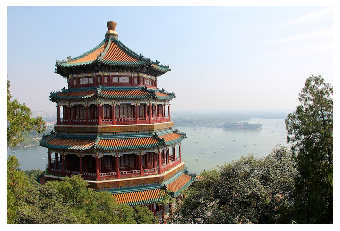

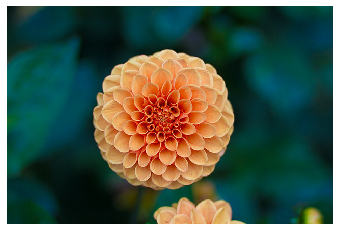

In [3]:
import matplotlib.pyplot as plt

# function to plot RGB images

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

plot_color_image(china)
plt.show()
plot_color_image(flower)

# Scale Images

Let's scale the images by dividing by 255. Remember that each pixel in an image is represented by a byte from 0 to 255. And, its number is its pixel intensity.

In [4]:
import numpy as np

# slice off a few pixels prior to scaling

br = '\n'

print ('pixels as loaded:', br)

print ('china pixels:', end = '  ')
print (np.around(china[0][0], decimals=3))

print ('flower pixels:', end = ' ')
print (np.around(flower[0][0], decimals=3), br)

# scale images

china, flower = china / 255., flower / 255.

# slice off some pixels to verify that scaling worked

print ('pixels scaled:', br)

print ('china pixels:', end = '  ')
print (np.around(china[0][0], decimals=3))

print ('flower pixels:', end = ' ')
print (np.around(flower[0][0], decimals=3))

pixels as loaded: 

china pixels:  [174 201 231]
flower pixels: [ 2 19 13] 

pixels scaled: 

china pixels:  [0.682 0.788 0.906]
flower pixels: [0.008 0.075 0.051]


It looks like scaling worked because pixel intensity is between 0 and 1.

# Display Scaled Images

Let's plot the scaled images.

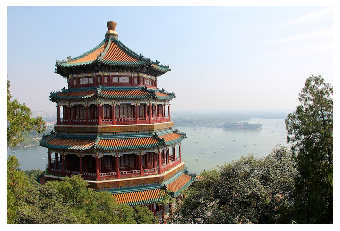

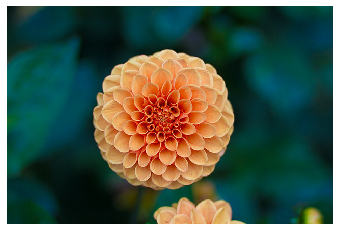

In [5]:
plot_color_image(china)
plt.show()
plot_color_image(flower)

We just verified that scaling doesn't impact images. This makes perfect sense because scaling modifies pixel intensity proportionally. That is, each pixel is converted proportionally to a number between 0 and 1.

# Get More Images

Let's get a couple more images.

1. mount Google Drive
2. path to images
3. convert images to numpy
4. scale images
5. display images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Copy Images to Google Drive

Before executing the following code snippet, please go to the URL for the book and copy the 'fish.jpg' and 'happy_moon.jpg' images to your Google Drive account. Also, check your Google Drive account to verify the proper path. We saved the images to the 'Colab Notebooks' directory, which is recommended. If you save it somewhere else, you must change the paths accordingly.

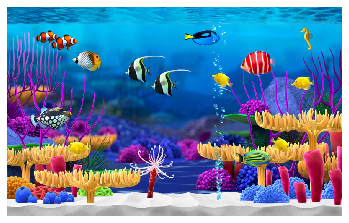

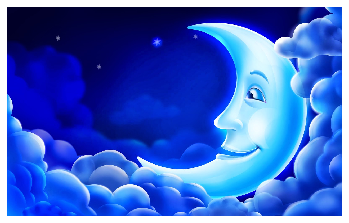

In [ ]:
# Be sure to copy images to the directory on Google Drive

from PIL import Image
import numpy as np

# create paths to images

fish_path = 'drive/My Drive/Colab Notebooks/fish.jpg'
moon_path = 'drive/My Drive/Colab Notebooks/happy_moon.jpg'

# create images

fish, moon  = Image.open(fish_path), Image.open(moon_path)

# convert images to numpy arrays and scale

fish, moon = np.array(fish), np.array(moon)
fish, moon = fish / 255., moon / 255.

# display images

plot_color_image(fish)
plt.show()
plot_color_image(moon)

# Resize Images

For machine learning applications, images must be of the same shape. So, we need to investigate before we move forward.

In [ ]:
# shapes of the new images

br = '\n'

print ('fish shape:', fish.shape)

print ('moon shape:', moon.shape, br)

# original image shape

print ('original image shape:', china.shape)

fish shape: (500, 800, 3)
moon shape: (1000, 1600, 3) 

original image shape: (427, 640, 3)


# Use 'skimage.tranform' to Resize Images

Since machine learning algorithms expect images of the same shape, let's resize the new images:

In [ ]:
from skimage.transform import resize

fish = resize(fish, (427, 640, 3))
moon = resize(moon, (427, 640, 3))

print (fish.shape)
print (moon.shape)

(427, 640, 3)
(427, 640, 3)


Using 'skimage' is the easiest way to resize images because it automatically takes care of interpolation, anti-aliasing, and other resizing issues. But, it may not always be the best method. Let's plot to see how well it worked.

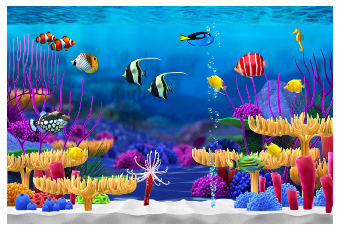

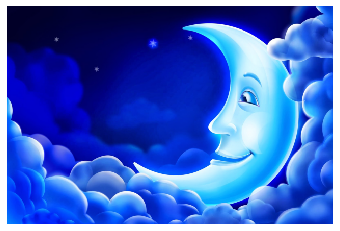

In [ ]:
plot_color_image(fish)
plt.show()
plot_color_image(moon)

Success! We resized the images and they look like good at least to our eyes. Just to be sure, let's check that the images were scaled between 0 and 1.

In [ ]:
# slice off some pixels and display

print ('fish pixels:', end = ' ')
print (np.around(fish[0][0], decimals=3), br)

print ('moon pixels:', end = ' ')
print (np.around(moon[0][0], decimals=3))

fish pixels: [0.046 0.526 0.679] 

moon pixels: [0.008 0.004 0.169]


# Create a List with All Images

Create a list that contains all four images:

In [ ]:
new_images = np.array([china, flower, fish, moon])

display (new_images.shape)

(4, 427, 640, 3)

So, we have four 427 x 640 color images (color is indicated by the 3 in the new_images shape) in our list.

# Create Filters

Let's now create two  simple 7 x 7 filters. We want our first filter to have a vertical white line in the middle and our second to have a horizontal white line in the middle. **Filters** are used to extract features from images during the process of convolution. Typically, filters are referred to as **convolutional kernels**.

In [ ]:
# assign some variables

batch_size, height, width, channels = new_images.shape

# create 2 filters

ck = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
ck.shape

(7, 7, 3, 2)

So, 'ck' is a 4D tensor that contains two 7 x 7 convolutional kernels with 3 channels. Our filters must have 3 channels to match the color images.

The **zeros** method returns a given shape and type filled with zeros. Since 'ck' is filled with zeros, all of its pixels are black. Remember that image pixel values are integers that range from 0 (black) to 255 (white). Now, let's change the pixel intensity of select pixels to get a vertical white line and a horizontal white line.

In [ ]:
ck[:, 3, :, 0] = 1  # add vertical line
ck[3, :, :, 1] = 1  # add horizontal line

Adding information to 4D images is quite complex, so we won't explain it.

# Plot Convolutional Kernels

Let's go ahead and plot the convolutional kernels:

vertical convolutional kernels:


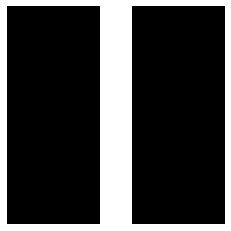

horizontal convolutional kernels:


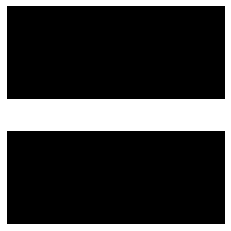

In [ ]:
# function to plot grayscale images

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

print ('vertical convolutional kernels:')

plot_image(ck[:, :, 0, 0])
plt.show()

print ('horizontal convolutional kernels:')
plot_image(ck[:, :, 0, 1])

So, we can see that the vertical and horizontal white lines were added properly.

# Apply a 2D Convolutional Layer to Images

Now we can apply a 2D convolutional layer to the images. We first need to indicate the version of TensorFlow. We then activate the GPU to get best results. Don't forget to change runtime type to add the GPU hardware accelerator!

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.2.0-rc4


In [ ]:
# To activate GPU:
# a) Runtime > Change runtime type -> Hardware accelerator
# b) choose 'GPU' from drop-down menu and Save
 
# test if GPU is active

tf.test.gpu_device_name()

'/device:GPU:0'

To run a robust CNN, we definitely need a GPU!

In [ ]:
# apply a 2D convolutional layer

outputs = tf.nn.conv2d(new_images, ck, strides=1, padding='SAME')

The **tf.nn.conv2d** method computes a 2D convolution given 4D input and convolutional kernel tensors. We set 'strides' equal to 1. A **stride** is the number of pixels we shift the convolutional kernels over the input matrix during training. When the stride is 1, we move the convolutional kernels 1 pixel at a time. We set 'padding' to 'SAME'. **Padding** is the amount of pixels added to an image when it is being processed by the CNN. For example, if the padding is set to zero, every pixel value that is added will be of value zero. Padding set to 'SAME' means that we use zero padding. Now, **outputs** contain the feature maps based on our images. Since each convolutional kernel creates a feature map (and we have 2 convolutional kernels), each image has 2 feature maps.

# Visualize Feature Maps

Let's visualize the feature maps we just created:

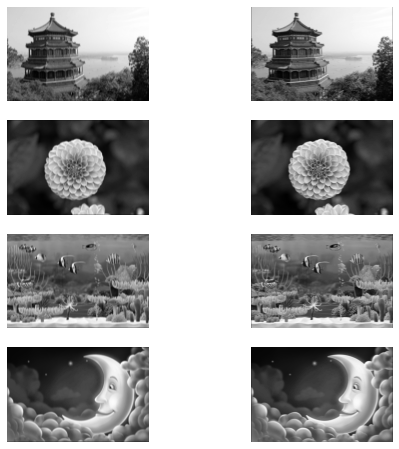

In [ ]:
rows = 4  # one row for each image
columns = 2  # two feature maps for each image
cnt = 1
fig = plt.figure(figsize=(8, 8))
for i, img in enumerate(outputs):
  for j in (0, 1):
    fig.add_subplot(rows, columns, cnt)
    plt.imshow(outputs[i, :, :, j], cmap='gray')
    plt.axis('off')
    cnt += 1
plt.show()

Since we have 2 convolutional kernels and 4 images, we have 8 feature maps (2 x 4). So, we have two feature maps for each image. If we look closely, we can tell that each feature map differs slightly for each image.

# CNN with Trainable Filters

We just **manually** defined two convolutional kernels. But, in a real CNN we typically define convolutional kernels as trainable variables so the neural net can learn the convolutional kernels that work best. Let's create a very simple model that lets the network decide the best convolutional kernels.

In [ ]:
# run a 2D convolutional layer on the images

from tensorflow import keras

conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding='SAME', activation='relu')

We begin by importing the **keras** module. We then create a **Conv2D** layer with 32 convolutional kernels. Each convolutional kernel is a 3 x 3 tensor indicated by **kernel_size**. We use a stride of 1 both horizontally and vertically. Padding is 'SAME'. Finally, we apply the ReLU activation function to the output.

As we can see, convolutional layers have quite a few hyperparameters including number of filters (convolutional kernels), height and width of convolutional kernels, strides, padding type, and activation type. To get the best performance, we should tune the hyperparameters. Since tuning is an advanced topic, we believe it is not appropriate to cover in an introductory book. Instead, we move ahead to examples to provide practice. We believe that good practice examples helps to develop practical skills. 

# Building a CNN

Although a CNN is a sequential neural net, it does differ from a feed-forward sequential neural net in two important ways. First, we build a convolutional base that is not fully connected. Second, we build a pooling layer to reduce the sample size of feature maps created by each convolutional layer. We still use a fully connected layer on top for classification.

We begin by loading a dataset of color images. We continue by preparing the data for TensorFlow consumption. We then build and test a CNN model. The dataset we start with is **cifar10**. We previously modeled this dataset, but our results were horrible. So, we want to show you how much better a CNN works on complex color images.

# Load Data

We can either load 'cifar10' data from **keras.datasets** or **TFDS**. Since it is easier to work with, let's load it from *keras.datasets*.

In [ ]:
from keras.datasets import cifar10

train, test = cifar10.load_data()

Using TensorFlow backend.


Now, we have train and test tuples that hold both images and labels. 

# Verify Data Shapes

In [ ]:
print ('train data:', br)
print (train[0].shape)
print (train[1].shape, br)
print ('test data:', br)
print (test[0].shape)
print (test[1].shape)

train data: 

(50000, 32, 32, 3)
(50000, 1) 

test data: 

(10000, 32, 32, 3)
(10000, 1)


Our dataset contains 50,000 train samples of 32 x 32 three channel images and one channel labels. It also contains 10,000 test samples of 32 x 32 three channel images and one channel labels. 

# Create Class Label Names

If we loaded the TFDS version of cifar10, we could directly extract the class label names. But, we loaded the data from keras.datasets. So, we manually create the label names.

In [ ]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                'horse', 'ship', 'truck']

# Create Simple Variables to Hold Train and Test Samples

In [ ]:
# create simple variables from train tuple

train_images = train[0]
train_labels = train[1]

# display first train label

print ('1st train label:', class_labels[train_labels[0][0]])

# create simple variables from test tuple

test_images = test[0]
test_labels = test[1]

# display first test label

print ('1st test label: ', class_labels[test_labels[0][0]])

1st train label: frog
1st test label:  cat


# Display Sample Images

It's always a good idea to display some images. In this case, we display 30 images from the training data. Visualization allows us to verify that images and labels correspond. That is, a frog image is labeled as a frog and so on.

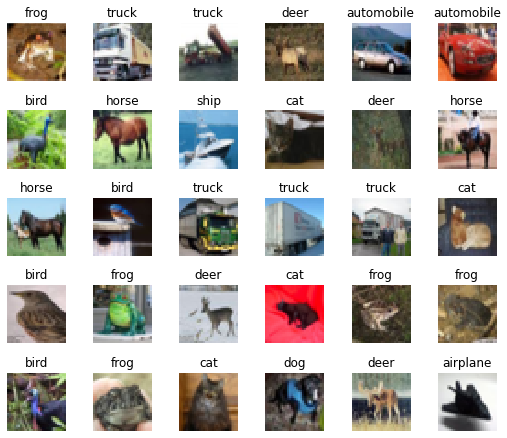

In [ ]:
n_rows = 5
n_cols = 6
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(train_images[index], cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_labels[int(train_labels[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Prepare Data for Training

First, scale the images. Next, ready train and test data for TensorFlow consumption.

In [ ]:
train_images = train_images / 255.  # divide by 255 to scale
train_labels = train_labels.astype(np.int32)

test_images = test_images/255.  # divide by 255 to scale
test_labels = test_labels.astype(np.int32)

print ('train images:', len(train_images))
print ('train labels:', len(train_labels), br)
print ('test images', len(test_images))
print ('test labels', len(test_labels))

train = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

train images: 50000
train labels: 50000 

test images 10000
test labels 10000


# Shuffle and Batch

In [ ]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 5000

train_ds = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_ds = test.batch(BATCH_SIZE)  # don't have to shuffle unseen test data

# Prefetch

Prefetch to improve training performance.

In [ ]:
# prefetch

train_ks = train_ds.prefetch(1)
test_ks = test_ds.prefetch(1)

# Create Model

We begin with a relatively robust CNN model because it is the only way to get decent performance from complex color images. But, don't be daunted by the number of layers! Remember that a CNN has a convolutional base and fully-connected network. So, we can think of a CNN in two parts. First, we build the convolutional base that includes one or more convolutional layers and pooling layers. Pooling layers are included to subsample the feature maps outputted from convolutional layers to reduce computational expense. Next, we build a fully-connected layer for classification.

Let's go ahead and create the model by following these steps:

1. import libraries
2. clear previous models
3. create the model

In [ ]:
# import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten, Dropout 

In [ ]:
# clear previous models and plant a seed

keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# build the model

model = Sequential([
    Conv2D(32, 3, activation = 'relu', padding='same', input_shape=[32, 32, 3]),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),    
    Dense(10, activation='softmax')
])

Let's begin with the convolutional base. The first layer uses 32 convolutional kernels of size 3 x 3. We don't need to use a stride because images are not very large. It also sets shape at 32 x 32 x 3 to match the 32 x 32 pixel images. Since images are in color, we include the 3 value at the end. Next, we include a max pooling layer of size 2 (so it divides each spatial dimension by a factor of 2) to subsample the feature maps from the first convolutional layer. We then we repeat the same structure twice, but we increase the number of convolutional kernels to 64. It is common practice to double the number of convolutional kernels after each pooling layer.

Let's continue with the fully-connected network. The next layer flattens its inputs because a dense network expects a 1D array of features for each instance. We continue with a dense layer of 64 neurons. We add dropout to reduce overfitting. The final dense layer accepts 10 inputs because this is the number of labels. It uses softmax activation.

# Compile the Model

In [ ]:
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We use the **Nadam** optimizer because it performs better!

In [ ]:
epochs = 10
history = model.fit(train_ks, epochs=epochs, verbose=1, validation_data=test_ks)

Epoch 1/10
391/391 [==============================] - 5s 12ms/step - loss: 1.7758 - accuracy: 0.3551 - val_loss: 1.4136 - val_accuracy: 0.4831
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.3869 - accuracy: 0.5035 - val_loss: 1.1505 - val_accuracy: 0.5866
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.2181 - accuracy: 0.5685 - val_loss: 1.0430 - val_accuracy: 0.6382
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 1.1053 - accuracy: 0.6098 - val_loss: 0.9436 - val_accuracy: 0.6725
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0232 - accuracy: 0.6402 - val_loss: 0.9053 - val_accuracy: 0.6934
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9634 - accuracy: 0.6634 - val_loss: 0.8476 - val_accuracy: 0.7078
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.9036 - accuracy: 0.6840 - val_loss: 0.8998 - val_accuracy: 0.6891

Although our model is not state of the art, we do pretty well compared to a feed-forward neural net. Of course, we can employ many advanced mechanisms to increase performance. But, we focus on developing introductory skills because you have to walk before you can run!

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

# Generalize on Test Data

In [ ]:
print('Train accuracy:', end=' ')
train_loss, train_acc = model.evaluate(train_ks, verbose=2)
print('Test accuracy:', end=' ')
test_loss, test_acc = model.evaluate(test_ks, verbose=2)

Train accuracy: 391/391 - 2s - loss: 0.6195 - accuracy: 0.7850
Test accuracy: 79/79 - 0s - loss: 0.8586 - accuracy: 0.7128


# Visualize Training

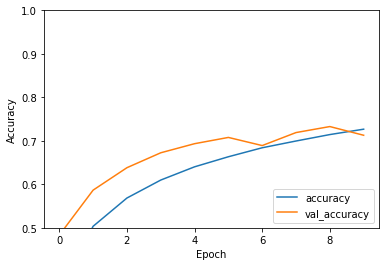

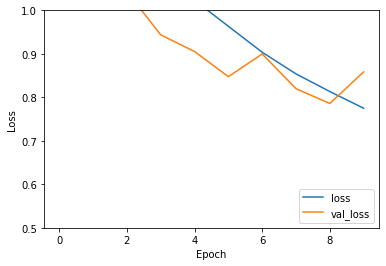

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')
plt.show()

# Predict Labels for Test Images

In [ ]:
predictions = np.argmax(model.predict(test_images), axis=-1)

Predictions by class number:

In [ ]:
# predictions by class number

predictions

array([3, 8, 0, ..., 5, 0, 7])

Predictions by label:

In [ ]:
# predictions by class label

np.array(class_labels)[predictions]

array(['cat', 'ship', 'airplane', ..., 'dog', 'airplane', 'horse'],
      dtype='<U10')

Let's make 5 predictions

In [ ]:
# make 5 predictions

pred_5 = predictions[:5]
pred_5

array([3, 8, 0, 0, 6])

In [ ]:
pred_labels = np.array(class_labels)[pred_5]
pred_labels

array(['cat', 'ship', 'airplane', 'airplane', 'frog'], dtype='<U10')

Compare predicitions with actuals:

In [ ]:
actual_5 = test_labels[:5]
actual_5

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=int32)

In [ ]:
actual_labels = np.array(class_labels)[actual_5]
actual_labels

array([['cat'],
       ['ship'],
       ['ship'],
       ['airplane'],
       ['frog']], dtype='<U10')

To get an idea of prediction performance, just compare **pred_labels** with **actual_labels**. However, it is easier to just visual.

# Visualize

Let's make 20 predictions and visualize results.

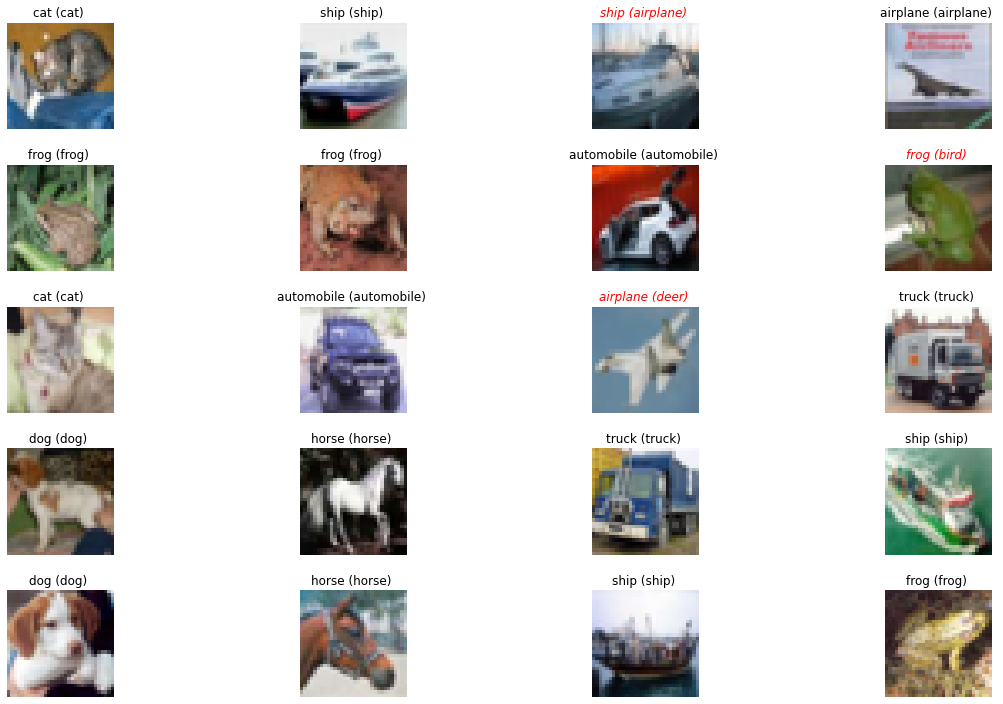

In [ ]:
# Plot the first X (num_rows * num_cols) test images (true and predicted labels)

num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  ax = plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(test_images[i])
  title = class_labels[int(test_labels[i])] + ' (' +\
  class_labels[predictions[i]] + ') '
  plt.title(title)
  if class_labels[int(test_labels[i])] != class_labels[predictions[i]]:
    ax.set_title(title, style='italic', color='red')
  plt.axis('off')
plt.tight_layout()

Titles in <strong><font color=red>red</font></strong> indicate misclassifications (if any).

# Confusion Matrix

As we explained in chapter 4, a confusion matrix shows correct classifications along the diagonal and misclassifications everywhere else. We recommend further analysis be directed at the highest areas of misclassification. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


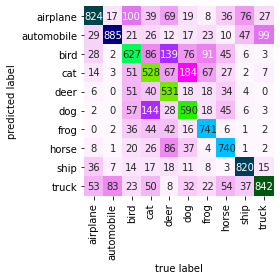

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
#import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, predictions)
plt.figure('confusion matrix')
sns.heatmap(cm.T, square=True, annot=True, fmt='d',
                cmap='gist_ncar_r',
                xticklabels=class_labels,
                yticklabels=class_labels, cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.tight_layout()
plt.show()

# Model TFDS Data

For completeness, let's model the TFDS dataset. We start by importing the **tfds** module from the **tensorflow_datasets** library. We then use the **load** method to get the data into memory. We continue by creating the input pipeline for TensorFlow consumption. We end by building and training the model.

In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.load('cifar10')

# Create Train and Test Data

Start building the input pipeline by splitting data into train and test sets.

In [ ]:
train, test = datasets['train'], datasets['test']

# Build the Rest of the Input Pipeline

In [ ]:
# shuffle, batch, scale, and prefetch

train_tfds = train.shuffle(10000).batch(32)
train_tfds = train_tfds.map(lambda items: (tf.cast(items['image'], tf.float32) / 255., items['label']))
train_tfds = train_tfds.prefetch(1)

test_tfds = test.batch(10000)
test_tfds = test_tfds.map(lambda items: (tf.cast(items['image'], tf.float32) / 255., items['label']))
test_tfds = test_tfds.prefetch(1)

# Build the Model

In [ ]:
# import libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten, Dropout 

In [ ]:
# clear previous models and plant a seed

keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# build the model

model = Sequential([
    Conv2D(32, 3, activation = 'relu', padding='same', input_shape=[32, 32, 3]),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),    
    Dense(10, activation='softmax')
])

# Compile the Model

In [ ]:
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model

In [ ]:
epochs = 10
history = model.fit(train_tfds, epochs=epochs, verbose=1,
                    validation_data=test_tfds)

Epoch 1/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6191 - accuracy: 0.4076 - val_loss: 1.2003 - val_accuracy: 0.5615
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2217 - accuracy: 0.5681 - val_loss: 1.0196 - val_accuracy: 0.6378
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0652 - accuracy: 0.6289 - val_loss: 0.9191 - val_accuracy: 0.6759
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9552 - accuracy: 0.6659 - val_loss: 0.8820 - val_accuracy: 0.6941
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8792 - accuracy: 0.6924 - val_loss: 0.8103 - val_accuracy: 0.7213
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8246 - accuracy: 0.7119 - val_loss: 0.7837 - val_accuracy: 0.7269
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7671 - accuracy: 0.7304 - val_loss: 0.8044 - val_a

# Get Information About the Data and Display Sample Images

One advantage of working with a TFDS is the ability to easily get information about the dataset and display images. Let's just load **train** data, but include the **with_info** parameter.

In [ ]:
train, info = tfds.load('cifar10', split='train', with_info=True)

In [ ]:
# get information about the data

info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.0,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

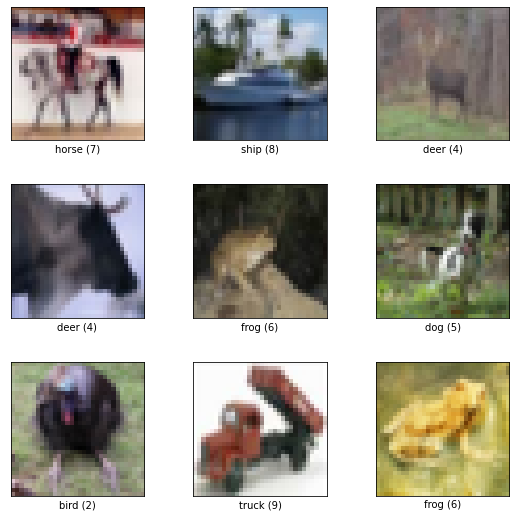

In [ ]:
# display sample images

fig = tfds.show_examples(info, train)

# Epilogue

Many improvements to the fundamental CNN architecture have been developed over the past few years that vastly improve prediction performance. Although we didn't cover these advances in this lesson, we believe that we have provided the basics to help you comfortably work with these recent advances and even the many advances to come.